Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.1209 - val_loss: nan
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0478 - val_loss: nan
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0454 - val_loss: nan
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0428 - val_loss: nan
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0389 - val_loss: nan
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0374 - val_loss: nan
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0361 - val_loss: nan
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0338 - val_loss: nan
Epoch 9/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0345 - val_loss: nan
Epoch 10/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0324 - val_loss: nan
Epoch 11/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0320 - val_loss: nan
Epoch 12/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0316 - va

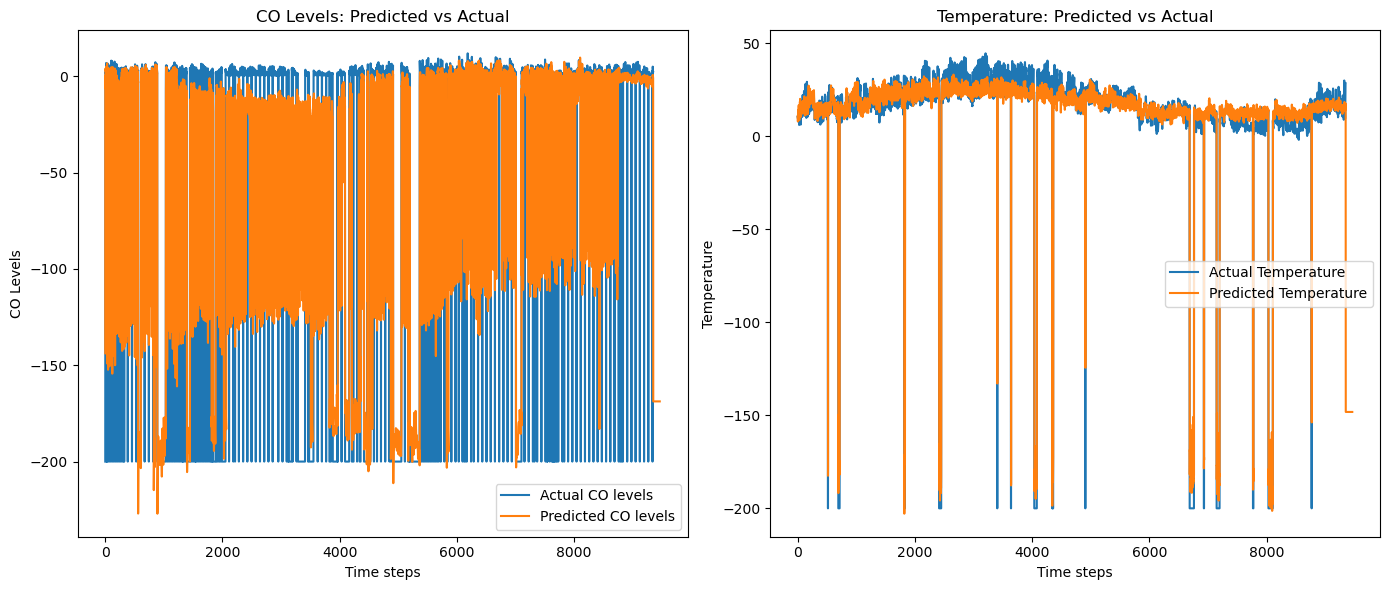

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AirQuality.csv', delimiter=';')

# Replace commas with periods in numeric columns
data = data.replace(',', '.', regex=True)

# Drop unnecessary unnamed columns
data_cleaned = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Convert appropriate columns to numeric data types
cols_to_convert = data_cleaned.columns[2:]  # All columns from CO(GT) onwards
data_cleaned[cols_to_convert] = data_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Selecting the features and target variables (CO levels and temperature)
features = data_cleaned[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                         'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]
targets = data_cleaned[['CO(GT)', 'T']]

# Normalizing the data
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
targets_scaled = scaler_targets.fit_transform(targets)

# Create time-series sequences
def create_sequences(features, targets, time_steps=10):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps), :])
        y.append(targets[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(features_scaled, targets_scaled, time_steps)

# Building the LSTM model with Input layer
model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # Predicting two targets (CO levels and temperature)

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X)

# Rescale the predictions back to original scale
predictions_rescaled = scaler_targets.inverse_transform(predictions)

# Rescale the actual values back to original scale
actual_rescaled = scaler_targets.inverse_transform(y)

# Plotting predicted vs actual values for CO levels and Temperature
plt.figure(figsize=(14, 6))

# CO levels plot
plt.subplot(1, 2, 1)
plt.plot(actual_rescaled[:, 0], label='Actual CO levels')
plt.plot(predictions_rescaled[:, 0], label='Predicted CO levels')
plt.title('CO Levels: Predicted vs Actual')
plt.xlabel('Time steps')
plt.ylabel('CO Levels')
plt.legend()

# Temperature plot
plt.subplot(1, 2, 2)
plt.plot(actual_rescaled[:, 1], label='Actual Temperature')
plt.plot(predictions_rescaled[:, 1], label='Predicted Temperature')
plt.title('Temperature: Predicted vs Actual')
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
pip install --upgrade numpy==1.25.0

Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - loss: 0.0894 - val_loss: nan
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0459 - val_loss: nan
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0417 - val_loss: nan
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0411 - val_loss: nan
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0377 - val_loss: nan
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0342 - val_loss: nan
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0331 - val_loss: nan
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0312 - val_loss: nan
Epoch 9/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0324 - val_loss: nan
Epoch 10/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0314 - val_loss: nan
Epoch 11/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0315 - val_loss: nan
Epoch 12/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0318 - va

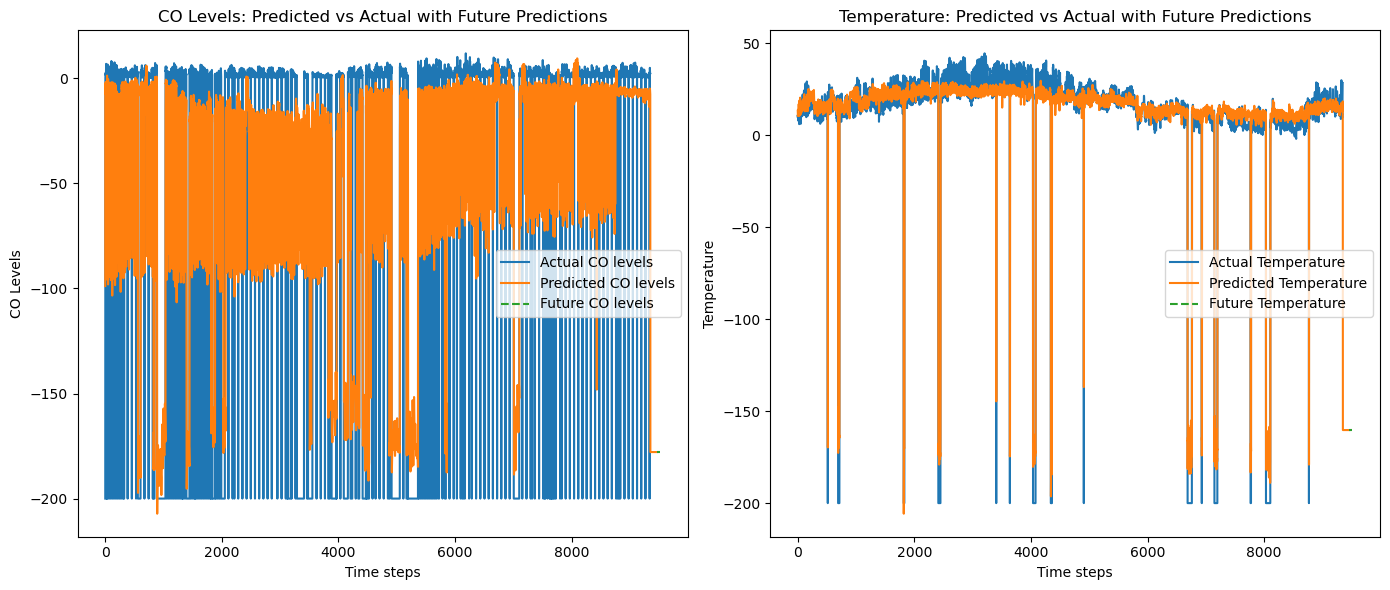

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AirQuality.csv', delimiter=';')

# Replace commas with periods in numeric columns
data = data.replace(',', '.', regex=True)

# Drop unnecessary unnamed columns
data_cleaned = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Convert appropriate columns to numeric data types
cols_to_convert = data_cleaned.columns[2:]  # All columns from CO(GT) onwards
data_cleaned[cols_to_convert] = data_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Selecting the features and target variables (CO levels and temperature)
features = data_cleaned[['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
                         'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]
targets = data_cleaned[['CO(GT)', 'T']]

# Normalizing the data
scaler_features = MinMaxScaler()
scaler_targets = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
targets_scaled = scaler_targets.fit_transform(targets)

# Create time-series sequences
def create_sequences(features, targets, time_steps=10):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:(i + time_steps), :])
        y.append(targets[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(features_scaled, targets_scaled, time_steps)

# Building the LSTM model with Input layer
model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # Predicting two targets (CO levels and temperature)

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Making predictions
predictions = model.predict(X)

# Rescale the predictions back to original scale
predictions_rescaled = scaler_targets.inverse_transform(predictions)

# Rescale the actual values back to original scale
actual_rescaled = scaler_targets.inverse_transform(y)

# Future prediction steps
def predict_future(model, last_sequence, future_steps, scaler_targets, scaler_features):
    future_predictions = []
    current_sequence = last_sequence.copy()  # Start with the last sequence

    for _ in range(future_steps):
        # Predict the next step
        next_pred = model.predict(current_sequence[np.newaxis, :, :])[0]

        # Store the prediction
        future_predictions.append(next_pred)

        # Update the sequence: remove the first entry and append the predicted CO and temperature,
        # while keeping the other features (e.g., other gases, RH, AH) constant from the previous step.
        next_sequence = current_sequence[1:, :]
        next_sequence = np.vstack((next_sequence, np.hstack((next_pred, current_sequence[-1, 2:]))))  # Replace only the CO and temperature with predictions

        current_sequence = next_sequence

    # Convert future predictions back to original scale
    future_predictions_rescaled = scaler_targets.inverse_transform(future_predictions)
    return future_predictions_rescaled

# Get the last sequence from the dataset for prediction
last_sequence = features_scaled[-time_steps:, :]

# Predict the next 50 future steps
future_steps = 50
future_predictions = predict_future(model, last_sequence, future_steps, scaler_targets, scaler_features)

# Plotting predicted vs actual values for CO levels and Temperature including future predictions
plt.figure(figsize=(14, 6))

# CO levels plot
plt.subplot(1, 2, 1)
plt.plot(actual_rescaled[:, 0], label='Actual CO levels')
plt.plot(predictions_rescaled[:, 0], label='Predicted CO levels')
plt.plot(np.arange(len(predictions_rescaled), len(predictions_rescaled) + len(future_predictions)), future_predictions[:, 0], label='Future CO levels', linestyle='dashed')
plt.title('CO Levels: Predicted vs Actual with Future Predictions')
plt.xlabel('Time steps')
plt.ylabel('CO Levels')
plt.legend()

# Temperature plot
plt.subplot(1, 2, 2)
plt.plot(actual_rescaled[:, 1], label='Actual Temperature')
plt.plot(predictions_rescaled[:, 1], label='Predicted Temperature')
plt.plot(np.arange(len(predictions_rescaled), len(predictions_rescaled) + len(future_predictions)), future_predictions[:, 1], label='Future Temperature', linestyle='dashed')
plt.title('Temperature: Predicted vs Actual with Future Predictions')
plt.xlabel('Time steps')
plt.ylabel('Temperature')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\vishi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


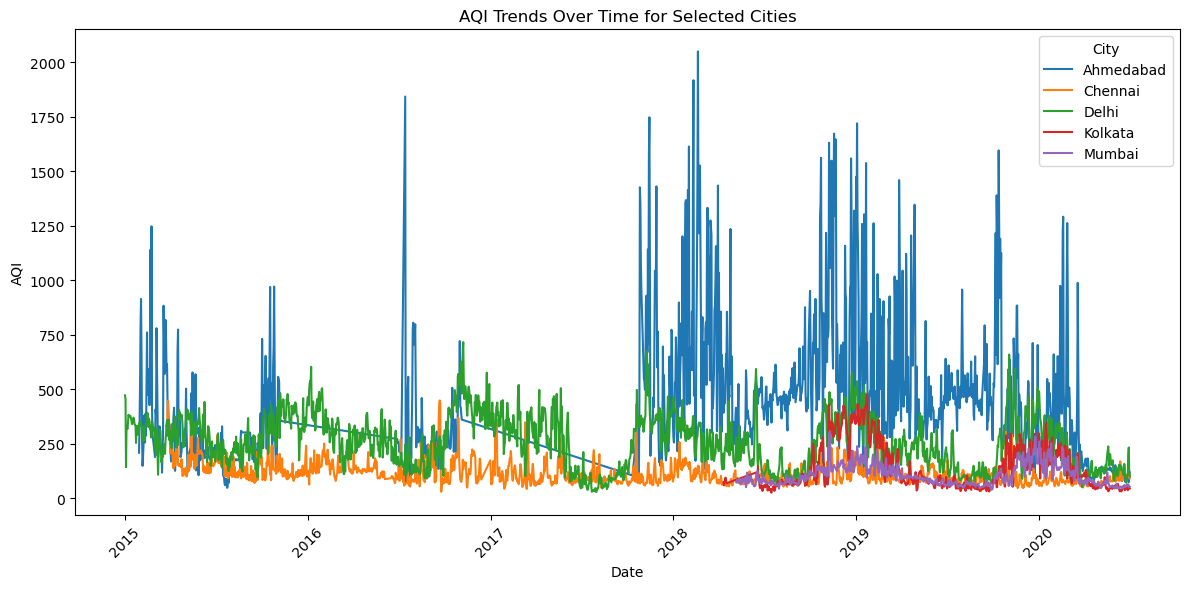

Training Accuracy (R-squared): 0.9250272715126076
Testing Accuracy (R-squared): 0.9229581911581968


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'city_day.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Select cities for AQI trend visualization
selected_cities = ['Ahmedabad', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata']
city_data = data[data['City'].isin(selected_cities)]

# Plot AQI trends over time for selected cities
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_data, x='Date', y='AQI', hue='City')
plt.title("AQI Trends Over Time for Selected Cities")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Selecting features and target for AQI prediction
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Drop rows with missing values in selected features
model_data = city_data.dropna(subset=features + [target])

# Split the data into features (X) and target (y)
X = model_data[features]
y = model_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate training and testing accuracy using R-squared score
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

# Display accuracy results
print("Training Accuracy (R-squared):", train_accuracy)
print("Testing Accuracy (R-squared):", test_accuracy)

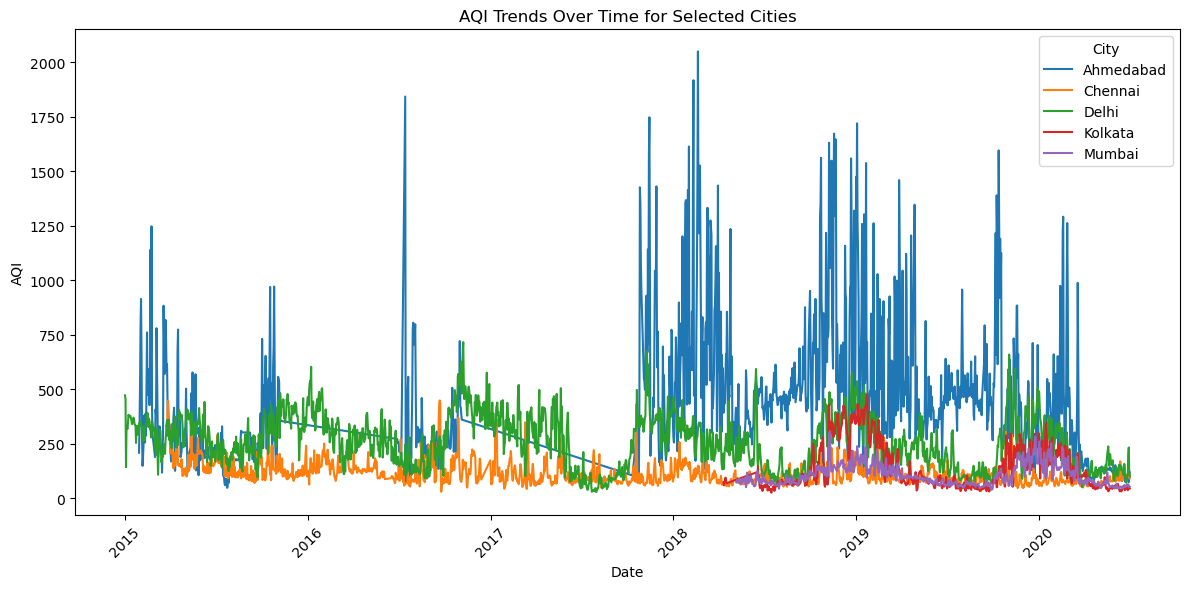

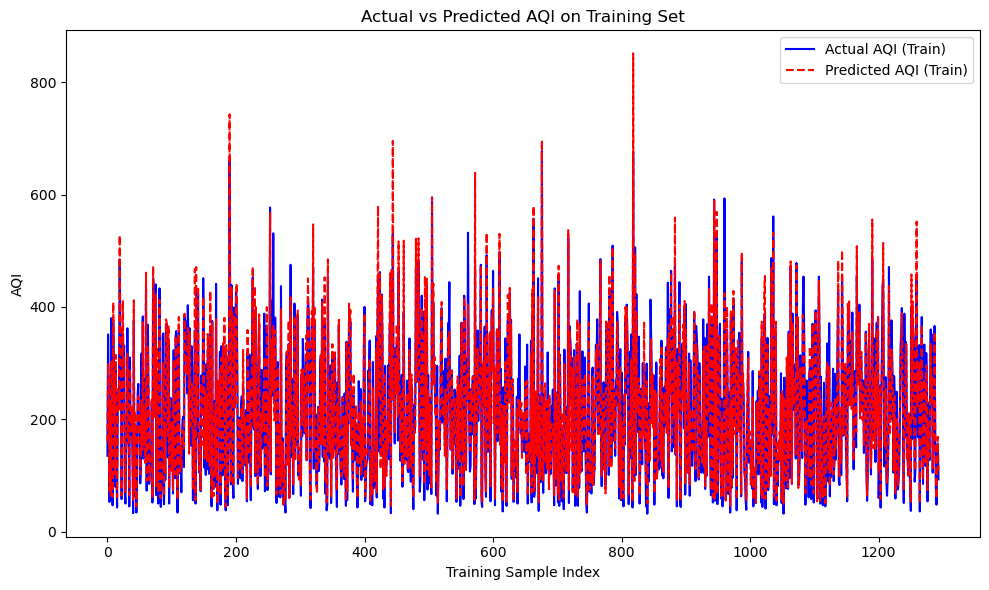

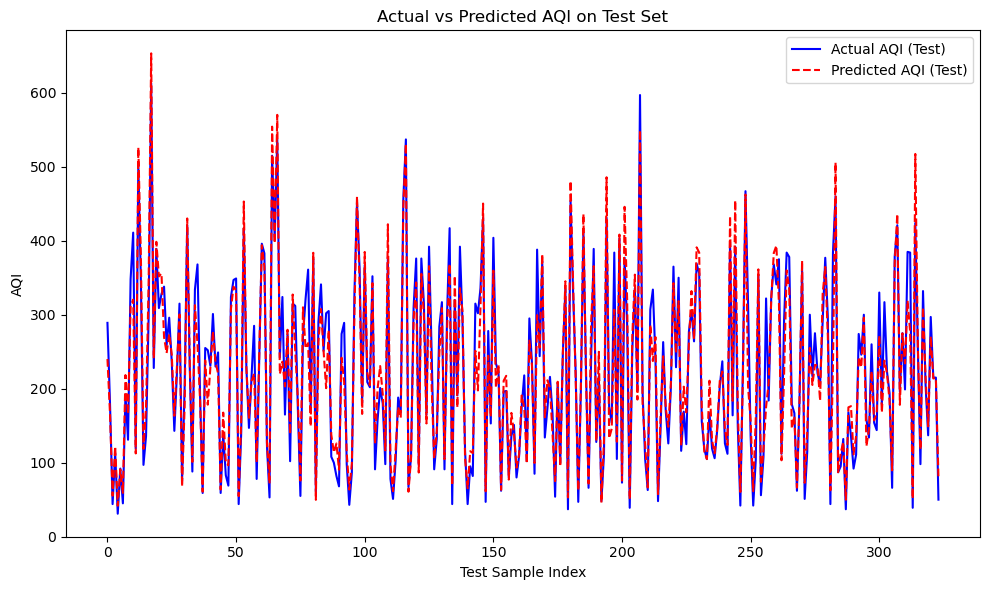

Training Accuracy (R-squared): 0.9250272715126076
Testing Accuracy (R-squared): 0.9229581911581968


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'city_day.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing AQI values
data = data.dropna(subset=['AQI'])

# Select cities for AQI trend visualization
selected_cities = ['Ahmedabad', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata']
city_data = data[data['City'].isin(selected_cities)]

# Plot AQI trends over time for selected cities
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_data, x='Date', y='AQI', hue='City')
plt.title("AQI Trends Over Time for Selected Cities")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Selecting features and target for AQI prediction
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Drop rows with missing values in selected features
model_data = city_data.dropna(subset=features + [target])

# Split the data into features (X) and target (y)
X = model_data[features]
y = model_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared scores for training and testing accuracy
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

# Plot actual vs predicted AQI for the training set
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual AQI (Train)', color='blue')
plt.plot(y_train_pred, label='Predicted AQI (Train)', color='red', linestyle='--')
plt.title("Actual vs Predicted AQI on Training Set")
plt.xlabel("Training Sample Index")
plt.ylabel("AQI")
plt.legend()
plt.tight_layout()
plt.show()

# Plot actual vs predicted AQI for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI (Test)', color='blue')
plt.plot(y_test_pred, label='Predicted AQI (Test)', color='red', linestyle='--')
plt.title("Actual vs Predicted AQI on Test Set")
plt.xlabel("Test Sample Index")
plt.ylabel("AQI")
plt.legend()
plt.tight_layout()
plt.show()

# Display accuracy results
print("Training Accuracy (R-squared):", train_accuracy)
print("Testing Accuracy (R-squared):", test_accuracy)